# [参考博客](https://blog.csdn.net/weixin_42946851/article/details/84401474)

## 实际应用项目和竞赛项目的区别
实际应用中，训练的样本相对于实际的数据集总是少的，而它的评分标准，是以实际的数据集的准确度作为参考的，而在竞赛项目中，用于检验结果的测试集相对于训练集是偏少的，但是竞赛的评估结果，是以测试集的匹配度作为依据的，所以有可能会出现实际应用中比较好的模型，但是在竞赛项目中，因为测试集特有的偏差，而导致竞赛的结果并不好，这是很正常的现象。而泰坦尼克号这个项目，就存在这个问题，因为我们最后的标准是那个测试集，所以要达到最好的竞赛结果，需要去迎合那个测试集的分布特征。因为这点差异，所以竞赛项目中要想获得好名次，所要采取的战略是不一样的，泰坦尼克号适合你熟悉整个的机器学习流程，但是对于要想获得好的结果，就需要不断的去调整特征工程，模型和超参数，而且最关键的是要有一个参考点，类似于A/B测试，发现哪些特征适用于这个测试集，不能盲目的尝试。

### 一般的机器学习分为以下几个步骤：
1. 定义问题
2. 导入数据
3. 理解分析数据
4. 清洗转换数据
5. 特征工程
6. 模型选择及超参数调优
7. 模型融合
8. 获得问题的答案

### 评价指标
[分类模型评估方法](https://blog.csdn.net/saltriver/article/details/74012163)(精确率，召回率，F-score, Acuuracy)
对于泰坦尼克号这个项目，预测结果不会对实际产生什么影响，我们的指标选择精度就够了。而对于癌症预测，将没有患癌的预测为患癌，可能只是需要多几次检查费用，而把患癌的预测为没有患癌，可能就会导致一个人失去生命。FP和FN对实际的影响不一样，这时候就要考虑Precision，Recall或者F-score.
### 关键技术
那么有哪些因素是影响最后的指标的呢，主要是以下四个方面：
1、特征工程的质量
2、样本的数量
3、模型的类型和结合方式
4、模型的超参数
其实就是上面8个步骤的5-7。


## 具体步骤

# 1、定义问题
#### 问题背景
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

这个项目的目的，是预测测试集中人员是否生还，也就是肯定当作二元分类的预测问题，因为是相对平衡的数据集，可以用精度作为衡量指标，而且生还和遇难并没有实质的区别（在数据层面上），所以不考虑准确度和召回率。
简单点说，就是利用训练数据集，训练模型，然后用测试数据集预测模型的精度。
# 2、导入数据
该项目的数据源可以在这个链接下载，[点这里下载项目数据](https://www.kaggle.com/c/titanic/data)

导入需要用到的模块 
#### 数据分析三剑客
* [numpy](https://www.numpy.org.cn/)：科学计算
* [pandas](https://www.cnblogs.com/peng104/p/10398490.html)：数据处理:Series和Dataframe类型
* [matplotlib](https://www.jianshu.com/p/da385a35f68d)：绘图
* [seaborn](https://segmentfault.com/a/1190000014915873?utm_source=tag-newest):基于matplotlib更高级的图形可视化

#### 机器学习
* [sklearn](https://www.cnblogs.com/wj-1314/p/10179741.html)

In [296]:
##导入需要用到的模块（我写这篇分享，是基于一个脚本写的，所以会把模块一次性全部导入，这样的好处是，所有的过程复现程度很快，实际挖掘过程中，刚开始是探索型的，很多子模块是根据需求加进去的）
#基础模块
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
#可以利用过滤器来实现忽略告警
import warnings
warnings.filterwarnings('ignore')


#模型预处理
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFECV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


#回归模型模块
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#分类模型模块
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier



##导入数据
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

# 3、理解分析数据
理解分析数据包括两个方面：
### 1. 检查数据是否有缺失，异常，大体的描述统计情况
### 2. 理解数据在实际场景中的含义


In [297]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


接下来我们来讲讲，各数据的真实场景含义。

PassengerId：客户的编号，可以当作SQL中的键值，没有实际的含义；

Pclass：船舱的等级，一般和票价是成正比的，但是我发现不少船票价格是0英镑的乘客，可能还有一些其他的因素；

Name：乘客的姓名，最基本的就是姓名加一个称呼；

Sex：性别；

Age：乘客的年龄；

SibSp：乘客的非直系亲戚数量；

Parch：乘客的直系亲戚数量（父母和孩子）；

Ticket：船票号码，有连号的说明是一起购买的；

Fare：船票的价格；

Cabin：具体的船舱位置；

Embarked：登陆的港口位置。

我们先对这些数据有一个感性的认识，具体的影响，还要在数据的图像化中发现。


In [298]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [300]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## 数据类型


**不同特征的数据类型?**

-  integer or floats：训练集：7个， 测试集6个.
-  strings (object)：5个.

**哪些特征是categorical**

Categorical: Survived,Sex, and Embarked. Ordinal: Pclass.

**哪写特征是numerical**

Continous: Age, Fare. Discrete: SibSp, Parch.

**混合数据类型的特征**

特征里同时包含数字，字母，这些特征需要一些预处理

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**一些特征中可能包含拼写错误**

对于一个大的数据集来说，这是很难检查的，但是从一个较小的数据集中检查几个样本可能会直接告诉我们哪些特性可能需要纠正。

- 比如名称功能可能包含错误或拼写错误，因为有多种方法用于描述名称，包括标题、圆括号和用于替代或短名称的引号。

**那些包含空值的特征需要修正**


- training dataset： Cabin > Age > Embarked features. （包含空值的数目排序）
- test dataset： Cabin > Age.


In [301]:
##还可以用isnull直接得到所有的缺失值，这种方式比较容易发现缺失值,方式其实很多啦，大家可以多试试。

train_df.isnull().sum(0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 数据分布

**numerical feature 值的分布?**

可以帮助我们估计训练集对实际问题具有多大程度的代表性。

- 训练集样本是891个，真实的数据有2224个，训练集占40%左右。
- Survived 取值 0 或 1.
- 大约 38%样本存活，而真实情况中存活率32%.
- 超过75%的乘客没有携带父母和孩子.
- 大约30%的乘客的兄弟姐妹或者配偶也在船上.
- 船票的差距很大， 有一小部分人的船票价格高达$512， 而75分位线上的票价才$31.
- 老人数量很少，仅有不到 1% 乘客年龄在 65-80.

In [302]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
#Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**categorical features分布**
- 没有重名的乘客 (count=unique=891)
- 性别有两个取值，male居多,577个.
- 船舱有部分重复值，多人共享一个船舱.
- Embarked 有3个取值，其中S港口登船乘客最多 (top=S)
- Ticket 有大约22%的重复值 (unique=681)，（其他方法指出有团体票，并且根据团体票重新计算了票价，而这个方法里面将Ticket直接舍弃了）.

In [303]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Becker, Master. Richard F",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### 数据分析

**Correlating.**

每个特征和存活的相关性

**Completing.**

1. 年龄特征于存活与否肯定具有相关性，因此要补充全缺失的年龄信息.
2. 登船港口也是如此.

**Correcting.**

1. 由于Ticket具有重复值，因此可能与存活与否没有太大关联性，因此舍弃了.
2. Cabin在训练集和测试集都有很多缺失数据，因此也将其舍弃.
3. PassengerId 也舍弃.
4. Name 并不规范，也将其舍弃.

**Creating.**

1. 合并SibSp和Parch为家庭成员数目family。	
2. 提取名字中title作为新特征.
3. 将年龄分段，这样连续的数值特征可以转换为类别特征.
4. 票价分段，有助于分析.

**Classifying.**

结合之前的问题描述.

1. 女性存活可能性更大.
2. 儿童存活可能行更大，但具体年龄界限不明确. 
3. 高等仓更容易存活.

#### Analyze by pivoting features

这种方法仅适用于分类（Sex）、序数（Pclass）或离散（sibsp、parch）类型的要素。

In [304]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [305]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [306]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [307]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化分析

#### 直方图：观察numerical数据分段区间分布

**观察**：
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**结论**:

- Age特征有用，训练时要使用
- 要补全缺失年龄数据
- 将特征处理成分段区间的类型

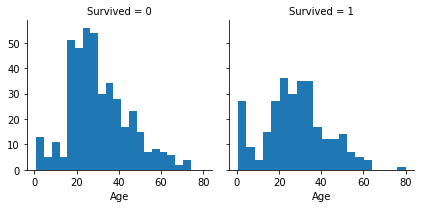

In [308]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Correlating numerical and ordinal features

**Observations.**

- 三等舱乘客最多，但是存活的却最少
- 二三等舱的婴幼儿存活率高
- 一等舱存活率最高
- 同等舱中的存活率和年龄有关.

**Decisions.**

- Consider Pclass for model training.

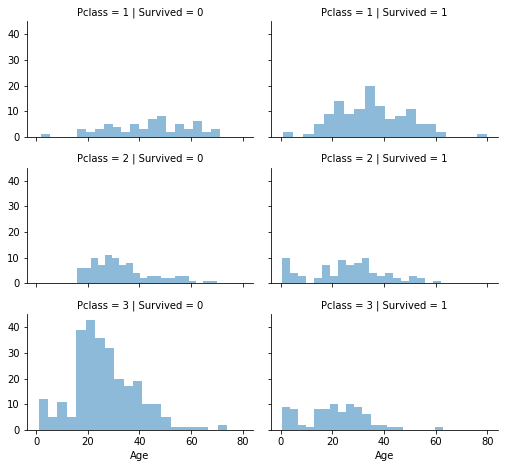

In [309]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**

- 总体来说，女性存活率盖与男性
- C港口的乘客男性存活率高于女性，可能港口和船舱等级有关，而船舱等级和存活率有关，并不是直接的港口和存活率的关系。

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

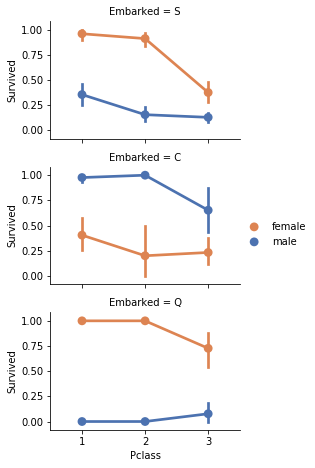

In [310]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**

- 船票价格高的存活率高.
- 登船港口和存活率有关.

**Decisions.**

- Consider banding Fare feature.

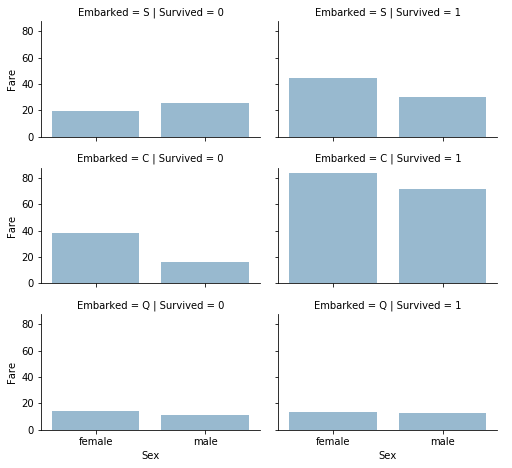

In [311]:
#grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 总结：
与存活与否相关特征Age，Pclass，SexSibSp，Parch， Embark

# 4、清洗转换数据
## 删除Ticket和Cabin特征

In [312]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

## 从名字中提取title并转换为类别类型

In [313]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [314]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [315]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## 删除原来Name特征

In [316]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## 性别特征转换

In [317]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 年龄补全，分段及特征转换
In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

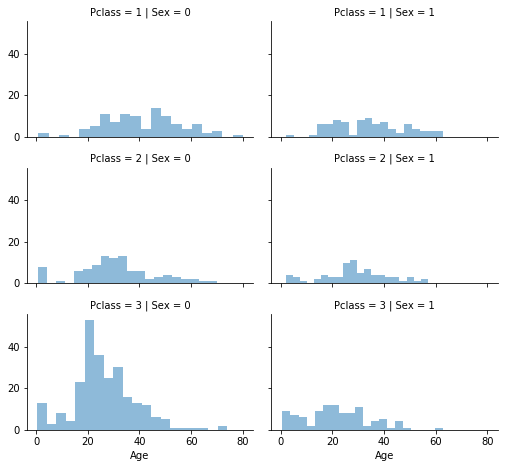

In [318]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [319]:
guess_ages=np.empty([3,4],dtype=int) 
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


分位5个年龄段

In [320]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [321]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [322]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 兄弟姐妹配偶合并为家庭成员数，并构造是否单身一人特征

In [323]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [324]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [325]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


## 构造Age*Class特征

In [326]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## 众数填充Embark

In [327]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [328]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## 中位数填充Fare，并转换为区间类别

In [329]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [330]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [331]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [332]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [334]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# 5 机器学习分类

### [单层感知机](https://www.cnblogs.com/huangyc/p/9706575.html)：误分类样本到分类面距离最小

In [336]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

### 支持向量机
- [支持向量机原理](https://blog.csdn.net/github_39261590/article/details/75009069)：仅关注离分类面很近的点（支持向量），正确分类同时保证支持向量到分类面距离最大。使用hingeloss
- SVM既可以用来分类，就是SVC；又可以用来预测，或者成为回归，就是SVR。sklearn中的svm模块中也集成了SVR类。另外，SVC也可以用来处理多分类。[使用方法](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.svm.SVC.html)
- [Linear SVC与SVC区别](https://www.cnblogs.com/zealousness/p/7757603.html)

In [337]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In [338]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.01

### logist回归预测：
- 原理：[线性模型+sigmoid](https://blog.csdn.net/lgb_love/article/details/80592147),定义交叉熵损失函数。用线性回归模型的预测值的结果去逼近真实标记的对数几率，考虑所有样本
- [sklearn.linear_model.LogisticRegression参数说明及用法](https://blog.csdn.net/mrxjh/article/details/78499801)

In [339]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

### 查看权重：
正系数增加响应的对数概率（从而增加概率），负系数减少响应的对数概率（从而降低概率）。

- 性别正相关，说明女性存活率更高(male: 0 to female: 1).
- 相反的，Pclass负相关.
- Age*Class 特征是有效的，因为系数表现为一定的负相关性.
- 同样Title 也是有效的，有一定的正相关性.

In [340]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


SVM与logistic regression
- 本例中SVM优于logistic regression
- [其他情况的选择](https://www.jianshu.com/p/1aa67a321e33)：根据feature数目和sample数目选择

- [SGDClassifier](https://www.jianshu.com/p/c9331e6f927a)：跟其他线性分类器差不多，只是它用的是mini-batch来做梯度下降 Linear classifiers (SVM, logistic regression, a.o.) with SGD training.
通过选择loss来选择不同模型，hinge是SVM，log是LR

In [341]:
# Stochastic Gradient Descent

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0005, shuffle=True,random_state=None,tol=1e-3,learning_rate='optimal')
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.97

### KNN
- [KNN原理](https://blog.csdn.net/sinat_30353259/article/details/80901746)：一个样本与数据集中的k个样本最相似， 如果这k个样本中的大多数属于某一个类别， 则该样本也属于这个类别。
- [KNeighborsClassifier参数及用法](https://blog.csdn.net/smallcases/article/details/78236412)

In [342]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

### 朴素贝叶斯
- [朴素贝叶斯原理及GaussianNB用法](https://blog.csdn.net/brucewong0516/article/details/78798359)：利用贝叶斯公式，通过先验概率和数据得到后验概率

In [343]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### [决策树](http://www.iikx.com/news/statistics/816.html)

In [242]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, Y_train) * 100, 2)
acc_dtc

86.76

### 以上方法都是使用的最基本的机器学习方法，默认参数。

其他处理技巧：
###  集成学习
[bagging 和 boosting](https://www.cnblogs.com/earendil/p/8872001.html)

In [203]:
bgc = BaggingClassifier()
bgc.fit(X_train, Y_train)
Y_pred = bgc.predict(X_test)
acc_bgc = round(bgc.score(X_train, Y_train) * 100, 2)
acc_bgc

86.31

In [204]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
Y_pred = abc.predict(X_test)
acc_abc = round(abc.score(X_train, Y_train) * 100, 2)
acc_abc

82.04

In [226]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, Y_train) * 100, 2)
acc_rfc

86.53

### 模型融合
[hard voting 和soft voting](https://www.cnblogs.com/volcao/p/9483026.html)


In [235]:

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')  # 无权重投票
# eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,1,1]) # 权重投票
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf,X_train,Y_train,cv=5, scoring='accuracy')
    print("准确率: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

准确率: 0.80 (+/- 0.01) [Logistic Regression]
准确率: 0.79 (+/- 0.03) [Random Forest]
准确率: 0.68 (+/- 0.10) [naive Bayes]
准确率: 0.80 (+/- 0.02) [Ensemble]



## [调参](https://www.jianshu.com/p/55b9f2ea283b):
- 网格搜索(Grid Search)：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。（为什么叫网格搜索？以有两个参数的模型为例，参数a有3种可能，参数b有4种可能，把所有可能性列出来，可以表示成一个3*4的表格，其中每个cell就是一个网格，循环过程就像是在每个网格里遍历、搜索，所以叫grid search）
- [gridSearchCV函数](https://blog.csdn.net/weixin_41988628/article/details/83098130)

In [238]:
from sklearn.model_selection import GridSearchCV
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}  # 搜索寻找最优的lr模型中的C参数和rf模型中的n_estimators
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, Y_train)
print('最优参数：',grid.best_params_)
Y_pred = grid.predict(X_test)
acc_grid = round(grid.score(X_train, Y_train) * 100, 2)
acc_grid

最优参数： {'rf__n_estimators': 200, 'lr__C': 100.0}


82.94

**提交结果**

In [245]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rfc, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_dtc]})
models.sort_values(by='Score', ascending=False)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', index=False)